# Covid Wastewater 

Karsyn Lee, Sam Sheridan, Surya Pugal 

In [33]:
import numpy as np

In [34]:
data = np.load("part1a.npz")

In [35]:
data.files

['N', 'Svc_0_pmf', 'Lc', 'Ic_0', 'gamma']

In [36]:
N = data["N"]
svc0 = np.array(data['Svc_0_pmf']).reshape(16)
lc = data['Lc']
Ic_0 = data['Ic_0']
gamma = data['gamma']

## Part 1 (a)

1) Simulate the disease for 120 days

In [37]:
from scipy.integrate import solve_ivp
from itertools import product, combinations

In [38]:
beta = np.linspace(0,1, 16).reshape(4,4)

In [39]:
def delta(t, y, beta, gamma):
    """derivative function"""
    Sc = y[0:16].reshape(4,4)
    Ic = y [16:20] 
    R = y[20]
    delta_S = -1 * beta * Sc * sum(Ic) / N
    delta_I = -1 * np.sum(delta_S, axis = 0) - gamma * Ic
    delta_R = np.array([gamma * sum(Ic)])
    return np.concatenate((delta_S.reshape(16), delta_I, delta_R))

In [40]:
initial_state = np.concatenate((svc0 * N, Ic_0, np.array([0])))

In [41]:
soln = solve_ivp(delta, (0, 120), initial_state, t_eval = np.arange(0, 121), args = [beta, gamma], dense_output=True)

2) Plot the values Svc and Ic over time, Plot overall S I R L values.

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

[]

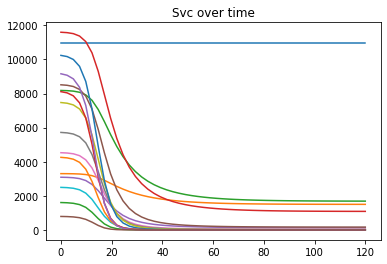

In [43]:
t = np.linspace(0, 120)
for i in range(16):
    y_val = [y[i] for y in soln.sol(t).T]
    plt.plot(t, y_val)
plt.title("Svc over time")
plt.plot()

[]

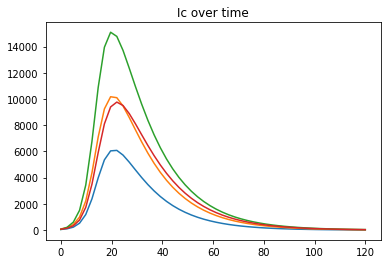

In [44]:
for i in range(4):
    t = np.linspace(0,120)
    y_val = [y[16 + i] for y in soln.sol(t).T]
    plt.plot(t, y_val)
plt.title("Ic over time")
plt.plot()

In [45]:
S = [np.sum(y[0:16]) for y in soln.y.T]
I = [np.sum(y[16:20]) for y in soln.y.T]
R = [y[20] for y in soln.y.T]
L = [np.sum(y[16:20] * lc)/N for y in soln.y.T]

[]

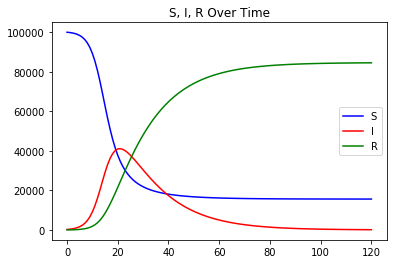

In [46]:
plt.plot(soln.t, S, color = "blue", label = "S")
plt.plot(soln.t, I, color="red", label = "I")
plt.plot(soln.t, R, color = "green", label = "R")
plt.title("S, I, R Over Time")
plt.legend()
plt.plot()

[]

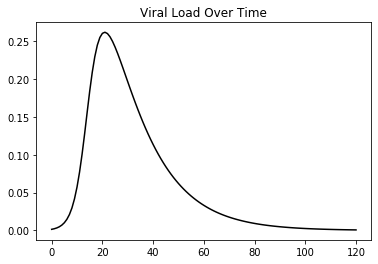

In [47]:
plt.plot(soln.t, L, color="black")
plt.title("Viral Load Over Time")
plt.plot()

3. Do the shapes of S, I, R look similar to what you expected? Which of these plots is the curve"
people refer to when they say fatten the curve"?

The shapes are to be expected. As the virus infects people, the infected rise and then the susceptible population decreaes as people recover. Flattening the curve refers to decreasing the number of infections. 

4. Do you observe that some Svc compartments converged to zero while others converged to a
positive value? Why do you think that is?

Yes some compartments of Svc converged to zero while other converged to a positive value. This is likely the people in the category of very socially vulerable and very comorbid because their entire population may have become infected, making their Svc 0. Other groups may reach a steady state of infetion and thus trend towards a positive umber. 

5. Print the percentages of population that never got infected for all compartments (i.e. all values
of v and c).

In [48]:
percent_never_infected = 100 * soln.y.T[120][0:16] / N

In [49]:
per = percent_never_infected.reshape(4,4)

In [50]:
for v in range(4):
    for c in range(4):
        print(f"v = {v}, c = {c} | percent never infected: {per[v][c]} ")

v = 0, c = 0 | percent never infected: 10.953309232250618 
v = 0, c = 1 | percent never infected: 1.4995244014568656 
v = 0, c = 2 | percent never infected: 1.6881368217876278 
v = 0, c = 3 | percent never infected: 1.0872923906687275 
v = 1, c = 0 | percent never infected: 0.13167350704564565 
v = 1, c = 1 | percent never infected: 0.1648678167329883 
v = 1, c = 2 | percent never infected: 0.03987500557475313 
v = 1, c = 3 | percent never infected: 0.022893541828906263 
v = 2, c = 0 | percent never infected: 0.013605692856213462 
v = 2, c = 1 | percent never infected: 0.0020680023297062725 
v = 2, c = 2 | percent never infected: 0.0038621742409664186 
v = 2, c = 3 | percent never infected: 0.0007318367182552813 
v = 3, c = 0 | percent never infected: 0.0001259606691507523 
v = 3, c = 1 | percent never infected: 0.00029072294600617914 
v = 3, c = 2 | percent never infected: 0.00015044963679741507 
v = 3, c = 3 | percent never infected: 5.970692187910265e-06 


6. Multiply all the beta values by 1/4. What happened to the S, I, R plots? Did the curve flatten
compared to the previous case? Print the percentages of population that never got infected with
these beta values.

In [51]:
beta_4 = beta / 4

In [52]:
soln_beta_4 = solve_ivp(delta, (0, 120), initial_state, t_eval = np.arange(0, 121), args = [beta_4, gamma], dense_output=True)

In [53]:
S4 = [np.sum(y[0:16]) for y in soln_beta_4.y.T]
I4 = [np.sum(y[16:20]) for y in soln_beta_4.y.T]
R4 = [y[20] for y in soln_beta_4.y.T]

[]

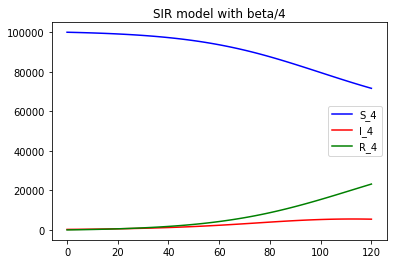

In [54]:
plt.plot(soln_beta_4.t, S4, color = "blue", label = "S_4")
plt.plot(soln_beta_4.t, I4, color = "red", label = "I_4")
plt.plot(soln_beta_4.t, R4, color = "green", label = "R_4")
plt.title("SIR model with beta/4")
plt.legend()
plt.plot()

In [55]:
percent_never_infected_4 = 100 * soln_beta_4.y.T[120][0:16] / N

In [56]:
per_4 = percent_never_infected_4.reshape(4,4)

In [57]:
for v in range(4):
    for c in range(4):
        print(f"v = {v}, c = {c} | percent never infected: {per_4[v][c]} ")

v = 0, c = 0 | percent never infected: 10.953309232250618 
v = 0, c = 1 | percent never infected: 3.1268969619460103 
v = 0, c = 2 | percent never infected: 7.340036159197621 
v = 0, c = 3 | percent never infected: 9.856602291626334 
v = 1, c = 0 | percent never infected: 2.488379355095483 
v = 1, c = 1 | percent never infected: 6.494161586780802 
v = 1, c = 2 | percent never infected: 3.273182421129709 
v = 1, c = 3 | percent never infected: 3.915204986576273 
v = 2, c = 0 | percent never infected: 4.846101461314061 
v = 2, c = 1 | percent never infected: 1.533438027287827 
v = 2, c = 2 | percent never infected: 5.958482455182028 
v = 2, c = 3 | percent never infected: 2.347186090578607 
v = 3, c = 0 | percent never infected: 0.8388361002898115 
v = 3, c = 1 | percent never infected: 4.012918214976419 
v = 3, c = 2 | percent never infected: 4.293003113414533 
v = 3, c = 3 | percent never infected: 0.3508044411763146 


The curve clearly flattened, as infections went way down. 

## Part 1 (b)

In [58]:
data = np.load("part1b.npz")

In [59]:
data.files

['N', 'Lc', 'Ic_0', 'gamma', 'L_validation', 'L_test', 'betas_validation']

In [60]:
N = data["N"]
Lc = data["Lc"]
Ic_0 = data["Ic_0"]
gamma = data["gamma"]
L_validation = data["L_validation"]
L_test = data["L_test"]
betas_validation = data['betas_validation']

Part 1

In [61]:
from sklearn.metrics import mean_squared_error

In [178]:
S02 = [0.5, 0.3, 0.1, 0.1] * N
S04 = [0.4, 0.3, 0.2, 0.1] * N
S06 = [0.3, 0.3, 0.2, 0.2] * N
S08 = [0.1, 0.2, 0.3, 0.4] * N

In [230]:
def delta2(t, y, beta, gamma, n):
    S = np.array(y[0:4])
    I = np.array(y[4:8])
    R = np.array(y[8])
    
    dS = -1 * beta * S * sum(I) / n
    dI = -1 * dS - gamma * I
    dR = np.array([gamma * sum(I)])
    
    return np.concatenate((dS, dI, dR))

In [231]:
def find_beta(S, I, validation, lc):
    """searches for beta's which minimize MSE
        S is an array of length 4
        I is an array of dim (5, 20)
        validation is an array of dim (5,20)
        lc is a constant
    """
    mmse = np.inf #set initial minimum mse
    beta = np.nan # set initial beta
    
    for j in range(5): #iterate over nodes with same vulnerability
        I_j = I[j]
        
        initial_values = np.concatenate((S, I_j, np.array([0]))) #initial values
        search_space = np.linspace(0,1, 21) #search grid
        v = validation[j]
        
        for i in range(17): #search over increasing, close groups of 4 in space | not exhaustive but good enough
            b = search_space[i:i+4]
            soln = solve_ivp(delta2, (0, 20), initial_values, t_eval=np.arange(0,20), args = [b, gamma, N], dense_output=True)
            load = [sum(y[4:8] * lc) for y in soln.y.T] #calculate viral load
            mse = mean_squared_error(load, v) 
            if mse < mmse:
                #update min mse and beta
                mmse = mse
                beta = b      
    return beta

In [232]:
beta_hat02 = find_beta(S02, Ic_0[0:5], L_validation[0:5], lc)
beta_hat04 = find_beta(S04, Ic_0[5:10], L_validation[5:10], lc)
beta_hat06 = find_beta(S06, Ic_0[10:15], L_validation[10:15], lc)
beta_hat08 = find_beta(S08, Ic_0[15:20], L_validation[15:20], lc)

In [233]:
betas = np.array([beta_hat02, beta_hat04, beta_hat06, beta_hat08])

In [234]:
print(f"estimated betas:\n {betas} \ntrue betas: \n{betas_validation}")

estimated betas:
 [[0.1  0.15 0.2  0.25]
 [0.2  0.25 0.3  0.35]
 [0.45 0.5  0.55 0.6 ]
 [0.55 0.6  0.65 0.7 ]] 
true betas: 
[[0.1  0.15 0.2  0.25]
 [0.2  0.25 0.3  0.4 ]
 [0.35 0.45 0.5  0.6 ]
 [0.4  0.5  0.6  0.8 ]]


Part 2

In [235]:
beta02 = find_beta(S02, Ic_0[0:5], L_test[0:5], lc)
beta04 = find_beta(S04, Ic_0[5:10], L_test[5:10], lc)
beta06 = find_beta(S06, Ic_0[10:15], L_test[10:15], lc)
beta08 = find_beta(S08, Ic_0[15:20], L_test[15:20], lc)

In [236]:
beta_estimates = np.array([beta02, beta04, beta06, beta08])

In [226]:
print(f"beta estimates: \n {beta_estimates}")

beta estimates: 
 [[0.05 0.1  0.15 0.2 ]
 [0.2  0.25 0.3  0.35]
 [0.5  0.55 0.6  0.65]
 [0.65 0.7  0.75 0.8 ]]


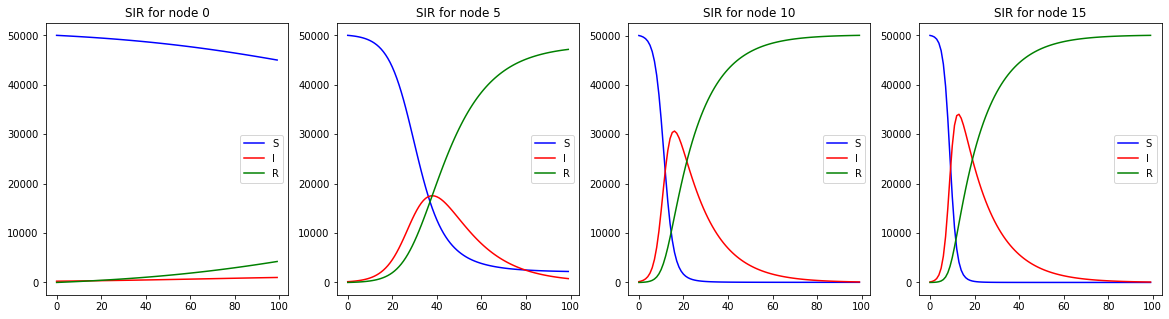

In [268]:
fig, ax = plt.subplots(1, 4, figsize = (20,5))
Sc = [S02, S04, S06, S08]
viral_loads = []
for i, sc in enumerate(Sc):
    iv = np.concatenate((sc, Ic_0[i*5], np.array([0])))
    soln = solve_ivp(delta2, (0, 100), iv, t_eval=np.arange(0,100), args = [beta_estimates[i], gamma, N], dense_output=True)
    S = [np.sum(y[0:4]) for y in soln.y.T]
    I = [np.sum(y[4:8]) for y in soln.y.T]
    R = [y[8] for y in soln.y.T]
    L = [np.sum(y[4:8] * lc)/N for y in soln.y.T]
    
    viral_loads.append(L)
    
    ax[i].plot(soln.t, S, color = "blue", label = "S")
    ax[i].plot(soln.t, I, color = "red", label = "I")
    ax[i].plot(soln.t, R, color = "green", label = "R")
    ax[i].set_title(f"SIR for node {i*5}")
    ax[i].legend()

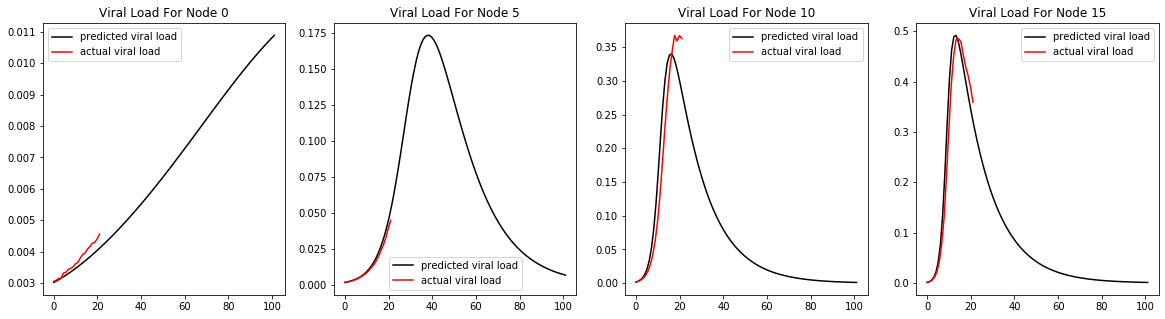

In [274]:
fig, ax = plt.subplots(1, 4, figsize = (20, 5))
actual = L_test/N
for idx, v in enumerate(viral_loads):
    t = np.linspace(0,101, 100)
    t1 = np.linspace(0,21, 20)
    ax[idx].plot(t, v, color = "black", label = "predicted viral load")
    ax[idx].plot(t1, actual[idx*5], color = "red", label = "actual viral load")
    ax[idx].legend()
    ax[idx].set_title(f"Viral Load For Node {idx * 5}")